In [2]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
sns.set()

file = "data/demographics.csv"
csv = pd.read_csv(file, low_memory=False)

# Version numbers are meaningless
sixminutev4 = pd.read_csv('data/6minutewalkV4-V2.csv') # table 
sixminutev6 = pd.read_csv('data/6minutewalkV4-V6.csv')
sixminutev1 = pd.read_csv('data/6minutewalkV4-V1.csv') # table
sixminutev2 = pd.read_csv('data/6minutewalkV2.csv')
cvhealth = pd.read_csv('data/CVHealth.csv')

csv.drop(columns=['ROW_ID', 'ROW_VERSION', 'appVersion', 'phoneInfo', 'dataGroups', 'uploadDate', 'createdOn', 
                  'validationErrors', 'userSharingScope', 'NonIdentifiableDemographics.json.patientGoSleepTime', 
                  'NonIdentifiableDemographics.patientGoSleepTime', 'createdOnTimeZone',
                 'NonIdentifiableDemographics.json.patientWakeUpTime', 'NonIdentifiableDemographics.patientWakeUpTime'
                 , 'externalId'], 
         inplace=True)
csv.rename(columns={'NonIdentifiableDemographics.json.patientWeightPounds': 'weight', 'NonIdentifiableDemographics.patientWeightPounds': 'weight2', 
                    'NonIdentifiableDemographics.json.patientBiologicalSex': 'sex', 
                    'NonIdentifiableDemographics.patientBiologicalSex': 'sex2',
                   'NonIdentifiableDemographics.json.patientHeightInches': 'height',
                   'NonIdentifiableDemographics.patientHeightInches': 'height2',
                   'NonIdentifiableDemographics.json.patientCurrentAge': 'currentAge',
                   'NonIdentifiableDemographics.patientCurrentAge': 'currentAge2'}, inplace=True)

# drop the test version
csv = csv.iloc[7:]
csv.index = range(44804)
csv.dropna(how='all', subset=['currentAge','currentAge2'], inplace=True)
csv.dropna(how='all', subset=['weight', 'weight2'], inplace=True)
csv.dropna(how='all', subset=['sex', 'sex2'], inplace=True)
csv.dropna(how='all', subset=['height', 'height2'], inplace=True)

csv['currentAge'] = csv['currentAge'].fillna(csv['currentAge2'])
csv['weight'] = csv['weight'].fillna(csv['weight2'])
csv['height'] = csv['height'].fillna(csv['height2'])
csv['sex'] = csv['sex'].fillna(csv['sex2'])
csv = csv.drop('currentAge2',1)
csv = csv.drop('weight2',1)
csv = csv.drop('height2',1)
csv = csv.drop('sex2',1)

# Dropping the duplicate healthCode records... Don't know if this is the right thing to do but can easily be reversed
csv = csv.drop_duplicates(subset='healthCode', keep='last', inplace=False)

# Dropping the rows with 0 for any metric. This was not caught with the NaN cleaning/merging 
csv = csv[csv.currentAge != 0]
csv = csv[csv.weight != 0]
csv = csv[csv.height != 0]

sixminutev4.drop(columns=['phoneInfo', 'appVersion', 'dataGroups', 'externalId', 'phoneInfo', 'ROW_VERSION', 
                             'ROW_ID', 'deviceMotion_fitness.rest.items', 
                             'heartRate_fitness.rest.items', 'userSharingScope',
                            'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items',
                            'deviceMotion_fitness.walk.items', 'heartRate_fitness.walk.items',
                            'accel_fitness_rest.json.items', 'createdOnTimeZone', 'recordId',
                            'uploadDate', 'validationErrors', 'createdOn', 'measurementSystem.measurementSystem',
                            'measurementSystem.deviceRegion'], inplace=True)
sixminutev6.drop(columns=['recordId', 'appVersion', 'externalId', 'dataGroups', 'createdOn', 'phoneInfo', 
                             'restingEnergyBurned_fitness.rest', 'restingEnergyBurned_fitness.walk', 'activeEnergyBurned_fitness.rest', 
                             'activeEnergyBurned_fitness.walk', 'measurementSystem.deviceRegion', 'measurementSystem.measurementSystem', 
                             'heartRate_fitness.rest', 'ROW_ID', 'ROW_VERSION', 'uploadDate',
                            'validationErrors', 'userSharingScope', 'accel_fitness_walk.json',
                            'deviceMotion_fitness.walk', 'userSharingScope','createdOnTimeZone',
                            'heartRate_fitness.walk', 'pedometer_fitness.walk', 'deviceMotion_fitness.rest',
                            'accel_fitness_rest.json'], inplace=True)

sixminutev1.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'uploadDate', 'phoneInfo',
                         'externalId', 'dataGroups', 'createdOn', 'createdOnTimeZone', 'userSharingScope',
                         'validationErrors', 'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items',
                         'deviceMotion_fitness.walk.items', 'HKQuantityTypeIdentifierHeartRate_fitness.walk.items',
                         'accel_fitness_rest.json.items', 'deviceMotion_fitness.rest.items',
                         'HKQuantityTypeIdentifierHeartRate_fitness.rest.items', 'measurementSystem.measurementSystem',
                         'measurementSystem.deviceRegion'], inplace=True)

sixminutev2.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'uploadDate', 'phoneInfo', 'createdOn', 
                          'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items', 'deviceMotion_fitness.walk.items', 
                         'HKQuantityTypeIdentifierHeartRate_fitness.walk.items', 'accel_fitness_rest.json.items',
                         'deviceMotion_fitness.rest.items', 'HKQuantityTypeIdentifierHeartRate_fitness.rest.items',
                         'externalId', 'dataGroups'], inplace=True)

sixminutewalktotal = pd.concat([sixminutev4, sixminutev6])
# Re-index to represent the actual length of the series
sixminutewalktotal.index = range(3373)
#csv
csv = csv[csv['healthCode'].isin(sixminutewalktotal['healthCode'])]
# Re-index 
csv.index = range(994)
cvhealth.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'phoneInfo', 'uploadDate', 
                             'externalId', 'dataGroups', 'createdOn', 
                             'createdOnTimeZone', 'userSharingScope', 'validationErrors', 
                             'family_history', 'medications_to_treat', 'vascular', 'ethnicity',
                            'race', 'education'], inplace=True)

csv = csv[csv['healthCode'].isin(cvhealth['healthCode'])]
# Re-index after dropping those without CVD data
csv.index = range(851)
healthCodeTotal = csv["healthCode"].values

v4 = csv[csv['healthCode'].isin(sixminutev4['healthCode'])]
v6 = csv[csv['healthCode'].isin(sixminutev6['healthCode'])]
v2 = csv[csv['healthCode'].isin(sixminutev2['healthCode'])]
v1 = csv[csv['healthCode'].isin(sixminutev1['healthCode'])]

v4 = np.asarray(v4['healthCode'].values)
v2 = np.asarray(v2['healthCode'].values)
v1 = np.asarray(v1['healthCode'].values)
v6 = np.asarray(v6['healthCode'].values)
sixminutetotalhc = np.concatenate((v4, v2, v1, v6))
csv

,recordId,healthCode,weight,sex,height,currentAge
0,b141e6da-ba2a-4267-82a7-8484ec264afc,660c450e-456c-4835-8cad-3d8842492913,200.0,Male,75.0,67.0
1,aa326e81-349d-4c95-9c15-4cf78fbda5eb,b04ae29d-7c3e-49fb-951b-69a6bead8ad9,209.0,Male,76.0,66.0
2,6056f89a-9827-4a28-b67c-fad59b97f793,bfdf60c0-c322-47f0-8a47-a52c7dc50ab9,92.0,Male,73.0,34.0
3,66aed6d3-f6e4-4ec0-be76-eed94d6db501,32ee6b1e-e3c9-48f2-b4e4-1d29ca134ce6,123.0,Female,67.0,30.0
4,1da48794-aefb-44a4-84da-e0cbafcff92a,552417f4-a4aa-4004-b1a7-0e97ac3b316a,204.0,Female,63.0,62.0
5,e2a10157-4750-4a54-8a22-327d55ae9c85,d5526dfd-f949-43a2-ba06-8f55348b8799,235.0,Male,74.0,56.0
6,197b358c-acf3-4eb3-bad2-59328108e0f2,42e867c0-8196-4d3e-b115-f0904fa088e0,186.0,Male,73.0,39.0
7,6ba6762a-004c-4b3a-9426-8978aca2538f,0e21d0ae-8922-484f-97dd-56d742cbe845,236.0,Male,67.0,84.0
8,1e955c4d-312d-4d79-88e6-504bd06fd2f3,6f8a0854-c9cf-4b89-b55a-a27f71fe09d3,160.0,Male,70.0,76.0
9,b0c53d31-805c-44f5-96bb-a6b8ee6d35e9,77ebb2e1-7079-485e-a1a8-e29b169de7bb,139.0,Female,69.0,42.0


# Sparsity Check

In [3]:
import os
import pandas as pd
# change this depending on data directory
directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

# number of gaps in a given 6MWT that surpasses the threshold

def find_gaps(directory):
    '''
    Finds the number of gaps over 0.01 seconds and adds a gap if the difference between last and first timestamp is 
    less than 6 minutes
    Checking the length of the dict returned will show whether the amount of files matches the intersection of 
    6mwt table and demographics
    '''
    hc_gaps = dict()
    for subdir, dirs, files in os.walk(directory):
        # make in [list] a parameter of the function
        if subdir.decode()[subdir.decode().rfind('/')+1:] in v6:
            # Makes sure we only get one file per healthCode
            i = 0
            for file in files:
                while (i < 1):
                    a_df = pd.read_json(os.path.join(subdir.decode(), file.decode())).set_index('timestamp')
                    inst = list(a_df.index[1:]-a_df.index[:-1] > .02).count(True)
                    # This line checks for incomplete 6MWT
                    if (a_df.index[-1] - a_df.index[0]) < 358:
                        inst = inst + 1
                    hc_gaps.update({subdir.decode()[subdir.decode().rfind('/')+1:]: inst})
                    i += 1
                
    return hc_gaps




# 6MWT Total Sample Check

### healthCodes of interest/associated synapse table:

1. cab9f4ee-54e0-4b08-8eba-3b48085bd142 (v4-v1)
2. 33f22bad-4570-43bb-bf68-263e6865ef76 (v4-v1)
3. ff489c8a-f5ff-4f00-9682-33c44df02621 (v4-v2)
4. 6fd3148e-f490-417a-9da8-a31d947e7aed (v4-v1)
5. bb6613c1-5b48-4744-a5f5-2387149da94d (v4-v2)
6. 43dcb6b4-24a9-4b71-bc9f-eef87e8adadb (v4-v2)
7. fe1e5f81-ed68-4c45-b1a7-3a7443d5ae76 (v4-v2)
8. 047b75f9-2778-4068-bc30-d47e8ea0780e (v4-v1)
9. c6a9c011-defc-48a9-bd74-de6d3a72d2bd (v4-v2)
10. e30dae44-8b7e-41a5-98e5-3f8abba35352 (v4-v1)

In [86]:
# hc_filenum is the dictionary which stores the healthCode and num of files associated with that healthCode

# num_of_files is just a list to count number of instances of certain number of files (Are there 0 files, 1 file...?)

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)
hc_filenum = dict()
for subdir, dirs, files in os.walk(directory):
    i = 0
    for file in files:
        i += 1
    hc_filenum.update({subdir.decode()[subdir.decode().rfind('/') + 1:]: i})


num_of_files = []
for k, v in test.items():
        num_of_files.append(v)

In [87]:
print(num_of_files.count(0))
print(len(hc_filenum))

2291
8129


/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


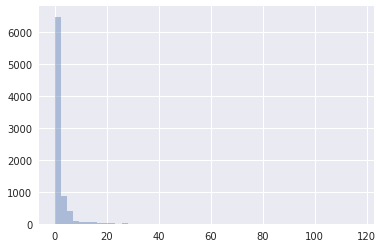

In [80]:
%matplotlib inline
sns.distplot(num_of_files, kde=False, rug=False)

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


TypeError: '<' not supported between instances of 'dict' and 'float'

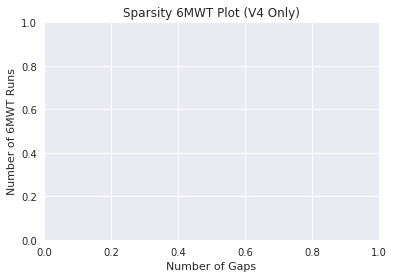

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

plt.title('Sparsity 6MWT Plot (V4 Only)')
# Set x-axis label
plt.xlabel('Number of Gaps')
# Set y-axis label
plt.ylabel('Number of 6MWT Runs')
sns.distplot(v4_onlydict, bins=400, kde=False, rug=False, color='purple')


/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


285

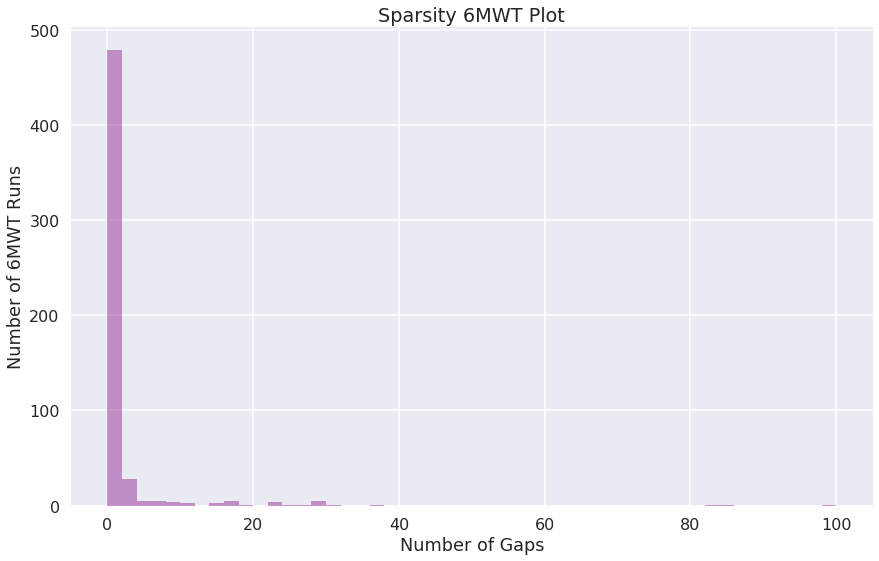

In [95]:
plt.title('Sparsity 6MWT Plot')
# Set x-axis label
plt.xlabel('Number of Gaps')
# Set y-axis label
plt.ylabel('Number of 6MWT Runs')
sns.distplot(v4_only, kde=False, rug=False, color='purple')

In [23]:
import pickle

# Save our gaps list so that we don't have to re-run
with open("gaps.txt", "wb") as fp:
    pickle.dump(instances, fp)

In [25]:
# This is so that we can re-open our gaps list
with open("gaps.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

8269

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


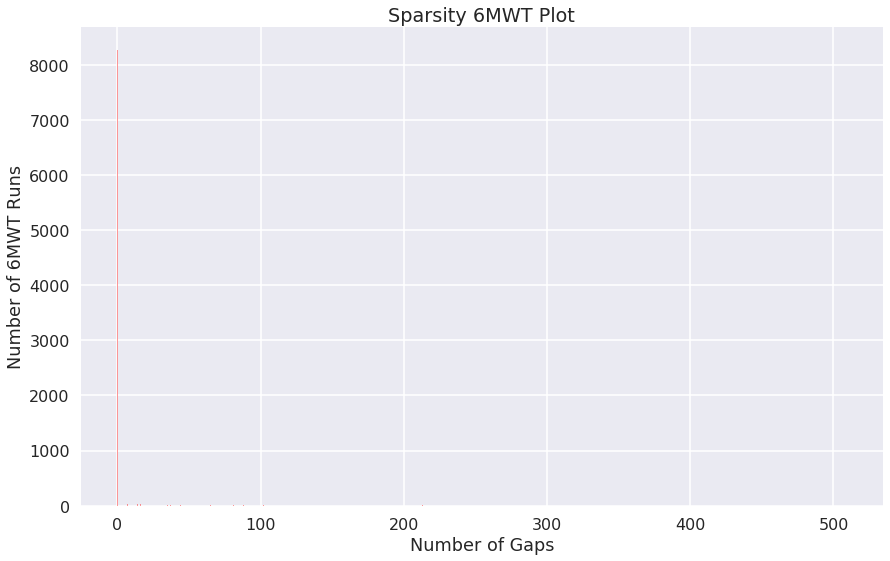

In [62]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
plt.style.use('seaborn-poster')
plt.title('Sparsity 6MWT Plot')
# Set x-axis label
plt.xlabel('Number of Gaps')
# Set y-axis label
plt.ylabel('Number of 6MWT Runs')

sns.distplot(instances, bins=5000, kde=False, rug=False, color='red')

# Feature Generation - 30 features
### Fix for the new dataframe format

In [70]:
import numpy as np
import peakutils
from numpy import linalg as LA
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Mean - 6 features
mux_t = np.mean(accelx_, axis=1)
muy_t = np.mean(accely_, axis=1)
muz_t = np.mean(accelz_, axis=1)

mux_f = np.mean(fft(accelx_), axis=1)
muy_f = np.mean(fft(accely_), axis=1)
muz_f = np.mean(fft(accelz_), axis=1)

# Median - 6 features
medx_t = np.median(accelx_, axis=1)
medy_t = np.median(accely_, axis=1)
medz_t = np.median(accelz_, axis=1)

medx_f = np.median(fft(accelx_), axis=1)
medy_f = np.median(fft(accely_), axis=1)
medz_f = np.median(fft(accelz_), axis=1)

# Magnitude - 6 features

magx_t = (LA.norm(accelx_, axis=1) / 200)
magy_t = (LA.norm(accely_, axis=1) / 200)
magz_t = (LA.norm(accelz_, axis=1) / 200)

magx_f = (LA.norm(fft(accelx_), axis=1) / 200)
magy_f = (LA.norm(fft(accely_), axis=1) / 200)
magz_f = (LA.norm(fft(accelz_), axis=1) / 200)

# Cross-correlation - 2 features

corr_xz = mux_t/muz_t
corr_yz = muy_t/muz_t

# Peak Count - 1 feature

def peak_counter(accel_windows):
    '''
    This function counts the number of peaks in by window in each acceleration dimension using peakutils library
    Below we are averaging peaks over each dimension, combining all axes, and re-averaging for a final feature
    '''
    peaks = []
    for i in range(len(accel_windows)):
        peaks.append(len(peakutils.indexes(accel_windows[i])))
    return peaks

peaks_x = np.mean(peak_counter(accelx_))
peaks_y = np.mean(peak_counter(accely_))
peaks_z = np.mean(peak_counter(accelz_))
total = [peaks_x, peaks_y, peaks_z]
avg_peaks = np.mean(total)

# Distance Between Peaks - 3 features

def dist_peak(accel_windows):
    # This is in seconds because timestamps are in seconds not ms
    sec_per_index = 0.01
    time_diffs = []
    for i in range(len(accel_windows)):
        peak_indices = peakutils.indexes(accel_windows[i])
        # Finds difference between consecutive index values so that we can multiply by 0.01 seconds
        dummy = [t - s for s, t in zip(peak_indices, peak_indices[1:])]
        for j in range(len(dummy)):
            time_diffs.append(dummy[j] * sec_per_index)
    return time_diffs

peak_dist_x = np.mean(dist_peak(accelx_))
peak_dist_y = np.mean(dist_peak(accely_))
peak_dist_z = np.mean(dist_peak(accelz_))

# Spectral Centroid - 3 features

def spectral_centroid(accel_windows):
    accel_freq = fft(accel_windows)
    centroids = []
    for i in range(len(accel_windows)):
        sum = 0
        for j in range(len(accel_windows[i])):
            sum += (accel_windows[i][j] * accel_freq[i][j] / 200)
        centroids.append(sum)
    return centroids

spectral_centroid_x = spectral_centroid(accelx_)
spectral_centroid_y = spectral_centroid(accely_)
spectral_centroid_z = spectral_centroid(accelz_)

# Average Difference from the Mean - 3 features

def average_dist_mean(accel_windows, mean):
    real = []
    dummy = []
    for i in range(len(accel_windows)):
        for j in range(len(accel_windows[i])):
            dummy.append(abs(accel_windows[i][j] - mean[i]))
        real.append(np.mean(dummy))
    return real

avg_dist_x = average_dist_mean(accelx_, mux_t)
avg_dist_y = average_dist_mean(accely_, muy_t)
avg_dist_z = average_dist_mean(accelz_, muz_t)

NameError: name 'accelx_' is not defined

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#from keras.models import Sequential
import json, os
from scipy.fftpack import fft, ifft
import itertools as it
import seaborn as sns
sns.set()

#directory_in_str = '/Users/bhargavyadavalli/Desktop/files'
#directory = os.fsencode(directory_in_str)

'''
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename[0:36])
'''
# The block above will print the file name without the '.json'


def moving_window(accelx, length, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + 99) for stream, i in zip(streams, it.count(step=step))])

def getTimestamp(fn):
    timestamp = []
    with open(fn) as f:
        a = json.load(f)
        for obj in a:
            timestamp.append(obj['timestamp'])
    return timestamp

def getAccelX(fn):
    accelx = []
    with open(fn) as f:
        a = json.load(f)
        accelx = [obj['userAcceleration']['x'] for obj in a]
    accelx_norm = [(sample - np.mean(accelx)) for sample in accelx]
    for _ in range(200, len(accelx), 100):
        accelx_window = list(moving_window(accelx_norm, 200))
    accelx_window = np.asarray(accelx_window)
    return (accelx, accelx_window, accelx_norm)

def getAccelY(fn):
    accely = []
    with open(fn) as f:
        a = json.load(f)
        accely = [obj['y'] for obj in a]
    accely_norm = [(sample - np.mean(accely)) for sample in accely]
    for _ in range(200, len(accely), 100):
        accely_window = list(moving_window(accely_norm, 200))
    accelx_window = np.asarray(accely_window)
    return (accely, accely_window, accely_norm)
            
def getAccelZ(fn):
    accelz = []
    with open(fn) as f:
        a = json.load(f)
        accelz = [obj['z'] for obj in a]
    accelz_norm = [(sample - np.mean(accelz)) for sample in accelz]
    for _ in range(200, len(accelz), 100):
        accelz_window = list(moving_window(accelz_norm, 200))
    accelz_window = np.asarray(accelz_window)
    return (accelz, accelz_window, accelz_norm)


def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())

# Show structure
#print(accelx_)

# Printing last element of first sub-list
#print(accelx_[0][100])

# Print middle element to show sliding window 
#print(accelx_[1][0])

# Show same element in the dataframe
#print(df.iloc[100])

# Check to see if last sub-list is same length as the rest
#print(len(accelx_))


# Use this for timestamp analysis/6MWT completeness check:

#df = pd.DataFrame({'x': getAccelX('/home/users/bhargavy/gait/data/test_accel_old2.json')[1], 'y': getAccelY('/home/users/bhargavy/gait/data/test_accel_old2.json')[1], 
#                'z': getAccelZ('/home/users/bhargavy/gait/data/test_accel_old2.json')[1]}, 
#                  columns=['x', 'y', 'z'])
#df

In [110]:
from heapq import nlargest
from scipy.fftpack import fft
import peakutils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as LA
import itertools as it
import os

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())

def moving_window(accelx, length, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + 99) for stream, i in zip(streams, it.count(step=step))])

data_fn="/home/users/bhargavy/gait/data/test_accel_old2.json"
a_df = normalize_dataset(pd.read_json(data_fn).set_index('timestamp'))

# prior to calling any of these functions please verify that dataframe is normalized & sliding windows are present
def fundamental_frequency(mag_):
    fundamental_freqs = []
    for mag_seg in mag_:
        ft_seg = fft(mag_seg)
        fundamental_freqs.append(LA.norm(np.mean(nlargest(3, ft_seg))))
    return np.asarray(fundamental_freqs)

def average_acceleration(mag_):
    return [np.mean(x) for x in mag_]

def peak_counter(mag_):
    '''
    This function counts the number of peaks in by window in each acceleration dimension using peakutils library
    Below we are averaging peaks over each dimension, combining all axes, and re-averaging for a final feature
    '''
    peaks = []
    for i in range(len(mag_)):
        peaks.append(len(peakutils.indexes(mag_[i])))
    return peaks


def find_max(mag_):
    maxes = [max(x) for x in mag_]
    return maxes

def find_min(mag_):
    mins = [min(x) for x in mag_]
    return mins

#'/scratch/PI/euan/projects/mhc/data/6mwt/device_motion_walk_dir/ac3d8511-f986-4742-9789-3cf25c570e0f/deviceMotion_fitness.walk.items-fd4cb443-ec52-45d6-a236-dd22b301fca32069541811376382614.tmp'
def generate_features(healthcode, fn):
    '''
    Applies normalization and sliding windows to the provided data file and 
    returns a dataframe with calculated features
    '''
    a_df = normalize_dataset(pd.read_json(fn).set_index('timestamp'))
    a_df_norm = np.sqrt(np.square(a_df).sum(axis=1))
    mag = np.asarray(a_df_norm)
    mag_ = list(moving_window(mag, 200))
    index = [healthcode for x in range(len(mag_))]
    return pd.DataFrame({'healthCode': index, 'fundamental_freq': fundamental_frequency(mag_), 'average_accel': average_acceleration(mag_), 
            'peakcount': peak_counter(mag_), 'max': find_max(mag_), 'min': find_min(mag_)},
            columns=['healthCode', 'fundamental_freq', 'average_accel', 'peakcount', 'max', 'min']).set_index('healthCode')




In [111]:
def filter_subjects(directory):
    # creates dict with healthcodes and number of gaps from find_gaps function
    new_dict = find_gaps(directory)
    # filters dict to remove those entries with more than 2 gaps
    filtered_new_dict = { k:v for k, v in new_dict.items() if v <= 2 }
    healthcodes = []
    for k, v in filtered_new_dict.items():
        healthcodes.append(k)
    return healthcodes

In [112]:
def create_frame(directory):
    '''
    Creates a final dataframe with all samples from valid healthcodes
    This: subdir.decode()[subdir.decode().rfind('/')+1:] just gets the healthcode part of a directory 
    Function should be slow with large amounts of files due to the concat Pandas function
    '''
    healthcodes = filter_subjects(directory)
    frames = []
    for subdir, dirs, files in os.walk(directory):
        if subdir.decode()[subdir.decode().rfind('/')+1:] in healthcodes:
            i = 0
            for file in files:
                while (i < 1):
                    frames.append(generate_features(subdir.decode()[subdir.decode().rfind('/')+1:], os.path.join(subdir.decode(), file.decode())))
                    i += 1
    return pd.concat(frames)



In [113]:
test_v4 = create_frame(directory)

In [133]:
test_v4.iloc[54232]

fundamental_freq    20.569116
average_accel        0.260486
peakcount            4.000000
max                  2.181821
min                  0.010256
Name: 79d3bd16-a9c4-445a-ba1a-689a9bd7150b, dtype: float64

In [115]:
test_v2 = create_frame(directory)

In [117]:
test_v1 = create_frame(directory)

In [119]:
test_v6 = create_frame(directory)

In [135]:
test_v6

,fundamental_freq,average_accel,peakcount,max,min
healthCode,,,,,
10669098-a1c4-4999-8641-304a795cab6a,97.166294,1.347905,21,1.594117,1.085934
10669098-a1c4-4999-8641-304a795cab6a,92.101188,1.345197,18,1.594014,1.013414
10669098-a1c4-4999-8641-304a795cab6a,91.044233,1.335240,13,1.604107,1.013414
10669098-a1c4-4999-8641-304a795cab6a,90.396824,1.325861,10,1.674813,1.100237
10669098-a1c4-4999-8641-304a795cab6a,88.643166,1.299271,9,1.674813,1.100237
10669098-a1c4-4999-8641-304a795cab6a,89.812589,1.291805,15,1.515533,1.158544
10669098-a1c4-4999-8641-304a795cab6a,86.738570,1.281931,19,1.353957,1.198837
10669098-a1c4-4999-8641-304a795cab6a,89.063145,1.313927,13,1.454978,1.227195
10669098-a1c4-4999-8641-304a795cab6a,93.351231,1.359814,17,1.523001,1.196345


In [130]:
newtotal_df = pd.concat([test_v4, test_v2, test_v1, test_v6]).drop_duplicates()

In [139]:
len(list(set(newtotal_df.index)))

175

In [141]:
newtotal_df.to_hdf('newtotal_df.h5', key='df', mode='w')

In [4]:
newtotal_df = pd.read_hdf('newtotal_df.h5', 'df')

In [5]:
newtotal_df

,fundamental_freq,average_accel,peakcount,max,min
healthCode,,,,,
fca1f041-51fd-4203-8c6b-acca6ade414b,67.821986,0.792537,10,1.577554,0.113738
fca1f041-51fd-4203-8c6b-acca6ade414b,80.736508,1.005917,12,1.781303,0.392767
fca1f041-51fd-4203-8c6b-acca6ade414b,65.701856,0.789781,12,1.781303,0.207250
fca1f041-51fd-4203-8c6b-acca6ade414b,55.012737,0.616445,8,1.338280,0.147776
fca1f041-51fd-4203-8c6b-acca6ade414b,44.613281,0.561142,8,1.152121,0.147776
fca1f041-51fd-4203-8c6b-acca6ade414b,38.019442,0.527792,10,1.116189,0.035923
fca1f041-51fd-4203-8c6b-acca6ade414b,41.875303,0.535828,9,1.231519,0.035923
fca1f041-51fd-4203-8c6b-acca6ade414b,45.353834,0.573736,8,1.231519,0.049794
fca1f041-51fd-4203-8c6b-acca6ade414b,51.567933,0.618440,9,1.263989,0.084135


In [6]:
def filter_demographics(demographics):
    merged = pd.DataFrame()
    indexlist = list(csv.healthCode)
    for e in list(set(newtotal_df.index)):
        if e in indexlist:
            merged = merged.append(csv.loc[csv['healthCode'] == e])
    merged = merged.drop(['recordId'], axis=1)
    merged = merged.set_index('healthCode')
    return merged

def find_lowest_num_samples(total_df):
    '''
    This function finds the minimum number of samples from all of the runs present so that we keep same dimensions
    for every run that we have
    '''
    total = [len(total_df.loc[x].average_accel) for x in list(set(total_df.index))]
    return min(total)

def min_df(lowest_num_of_samples, total_df):
    '''
    Returns the dataframe with features for every healthCode present so that there are only the minimum amount of 
    samples needed
    '''
    newdf = pd.DataFrame()
    unique_healthcodes = list(set(total_df.index))
    for elem in unique_healthcodes:
        newdf = newdf.append(total_df.loc[elem].iloc[:lowest_num_of_samples])
    return newdf

In [7]:
new_demographics = filter_demographics(csv)

In [8]:
new_demographics

,weight,sex,height,currentAge
healthCode,,,,
ce642e97-46ee-4b27-8faa-a604bfce454d,121.0,Male,63.0,57.0
20c05206-c80e-402f-8992-d855e3027649,220.0,Male,74.0,64.0
010f2c15-0e7c-42f2-b083-0882b16d2454,200.0,Male,70.0,68.0
29e4c1a9-f8b1-4ac0-9013-cc19ed3fc1ed,170.0,Male,72.0,64.0
36cf38d9-ed64-4ae1-a0aa-9e8b5023b1a8,178.0,Female,67.0,34.0
1618ecd7-5c44-4e26-bd20-8ae50104b3cc,177.0,Male,69.0,31.0
a9f6b31e-e3d2-4faa-ae33-8b4c8ba28926,135.0,Female,59.0,69.0
0405f382-2756-4a5b-9a1d-c2d3cb27bd79,200.0,Female,65.0,45.0
4e1c834f-e40a-4be3-b750-c45d0effd723,214.0,Male,72.0,44.0


In [9]:
# number of unique hc is 175
testing = min_df(find_lowest_num_samples(newtotal_df), newtotal_df)

In [10]:
testing

,fundamental_freq,average_accel,peakcount,max,min
healthCode,,,,,
ce642e97-46ee-4b27-8faa-a604bfce454d,120.293455,1.607654,7,1.987370,1.362618
ce642e97-46ee-4b27-8faa-a604bfce454d,123.707574,1.609990,7,2.050217,1.301985
ce642e97-46ee-4b27-8faa-a604bfce454d,117.540839,1.602556,10,2.181914,1.271352
ce642e97-46ee-4b27-8faa-a604bfce454d,118.717808,1.688231,11,2.434553,1.098702
ce642e97-46ee-4b27-8faa-a604bfce454d,118.740344,1.743435,18,2.434553,0.882758
ce642e97-46ee-4b27-8faa-a604bfce454d,104.300512,1.471686,20,2.164633,0.700503
ce642e97-46ee-4b27-8faa-a604bfce454d,90.611589,1.251354,11,2.662388,0.700503
ce642e97-46ee-4b27-8faa-a604bfce454d,99.311870,1.242406,19,2.662388,0.465456
ce642e97-46ee-4b27-8faa-a604bfce454d,103.943943,1.284273,13,2.184457,0.465456


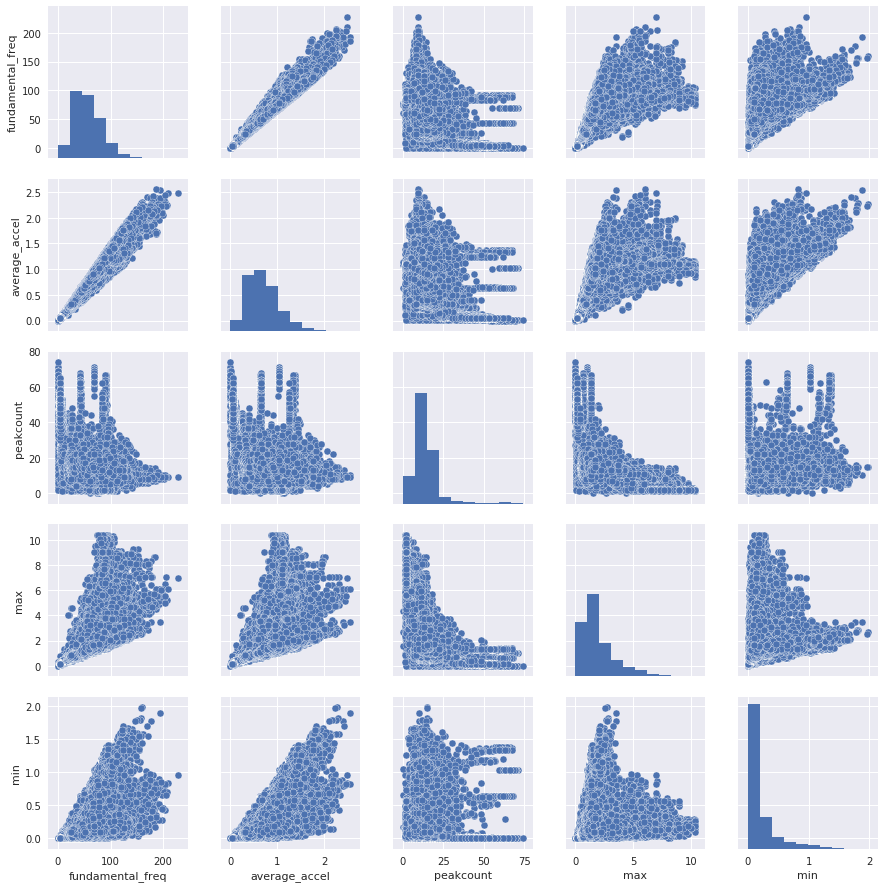

In [163]:
%matplotlib inline
sns.pairplot(testing)

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


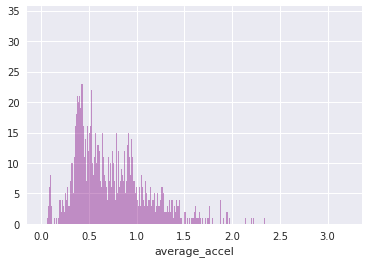

In [50]:
import seaborn as sns
sns.set()
sns.distplot(total_df['average_accel'], bins=10000, kde=False, rug=False, color='purple')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


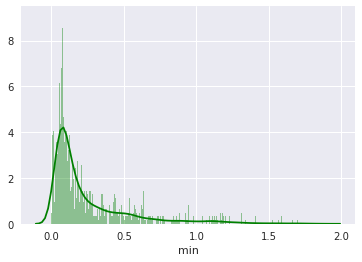

In [51]:
sns.distplot(total_df['min'], bins=10000, kde=True, rug=False, color='green')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


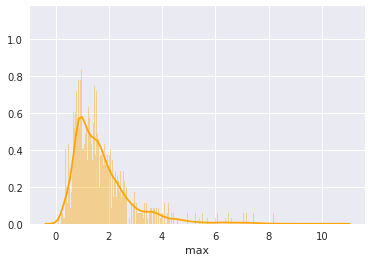

In [52]:
sns.distplot(total_df['max'], bins=10000, kde=True, rug=False, color='orange')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


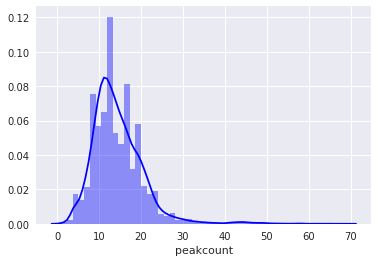

In [53]:
sns.distplot(total_df['peakcount'], bins=50, kde=True, rug=False, color='blue')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


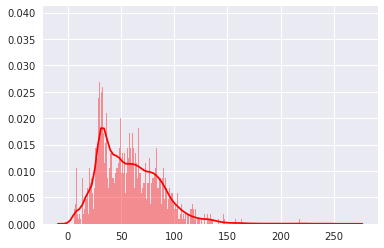

In [54]:
from numpy import linalg as LA
normed = [x for x in test_v4['fundamental_freq']]
sns.distplot(normed, bins= 10000, kde=True, rug=False, color='red')